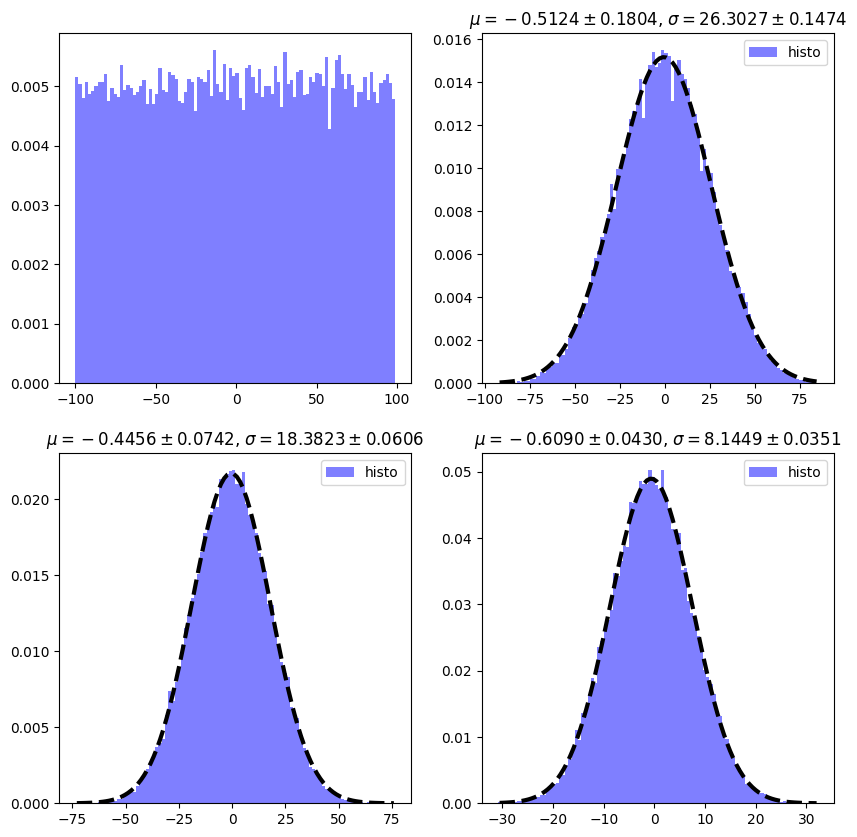

In [2]:
import numpy as np
import scipy as sp
from scipy import stats
from scipy.stats import norm
from scipy.optimize import curve_fit
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

# number of sample
num = [1, 5, 10, 50]
# list of sample means
means = []

x_low=-100
x_high=100
sample=50000
# Generating 1, 10, 50, 100 random numbers from x_low & x_high
# taking their mean and appending it to list means.
for j in num:

    # numpy.mean(a, axis=None, dtype=None, out=None, keepdims=<no value>, *, where=<no value>)[source]
    # Compute the arithmetic mean along the specified axis. (https://numpy.org/doc/stable/reference/generated/numpy.mean.html)
    # random.randint(low, high=None, size=None, dtype=int) Return random integers from low (inclusive) to high (exclusive). Return random integers from the “discrete uniform” distribution of the specified dtype in the “half-open” interval [low, high). If high is None (the default), then results are from [0, low).
    #https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html

    # Generating seed so that we can get same result every time the loop is run...
    #numpy.random.seed(1)
    x = [np.mean(np.random.randint(x_low, x_high, j)) for _i in range(sample)]
    means.append(x)
k = 0
histo_bin=100
# plotting all the means in one figure

fig, ax = plt.subplots(2, 2, figsize =(10, 10))

for i in range(0, 2):
    for j in range(0, 2):

        (mu, sigma) =  norm.fit(means[k])
        n, bins, patches = ax[i, j].hist(means[k], histo_bin, density=True, facecolor = 'blue', alpha = 0.5, label='histo');

        if k!=0:
            ax[i, j].legend()
            centers = (0.5*(bins[1:]+bins[:-1]))
            pars, cov = curve_fit(lambda data, mu, sig : norm.pdf(data, loc=mu, scale=sig), centers, n, p0=[0,1])

            ax[i, j].plot(centers, norm.pdf(centers,*pars), 'k--',linewidth = 3, label='fit')
            ax[i, j].set_title('$\mu={:.4f}\pm{:.4f}$, $\sigma={:.4f}\pm{:.4f}$'.format(pars[0],np.sqrt(cov[0,0]), pars[1], np.sqrt(cov[1,1 ])))

        k = k + 1

plt.show()